#Data_Retrieval:

title: "A computational framework for biomarker discovery in Neuroblastoma through multi-omics data"

Author: "Rahma Hussein Hassan Refky"

date: "Jan, 31, 2022"

last modified: "Apr, 20, 2023"

##To see which samples are present in each data type:

Importing packages:

In [1]:
import pandas as pd
import numpy as np
import venn
from matplotlib import pyplot as plt

Image showing hierarchy of data present on TARGET data base, red boxes (leaves of tree) contain a file named 'MANIFIST.txt' which contains names of all other files present in that directory.

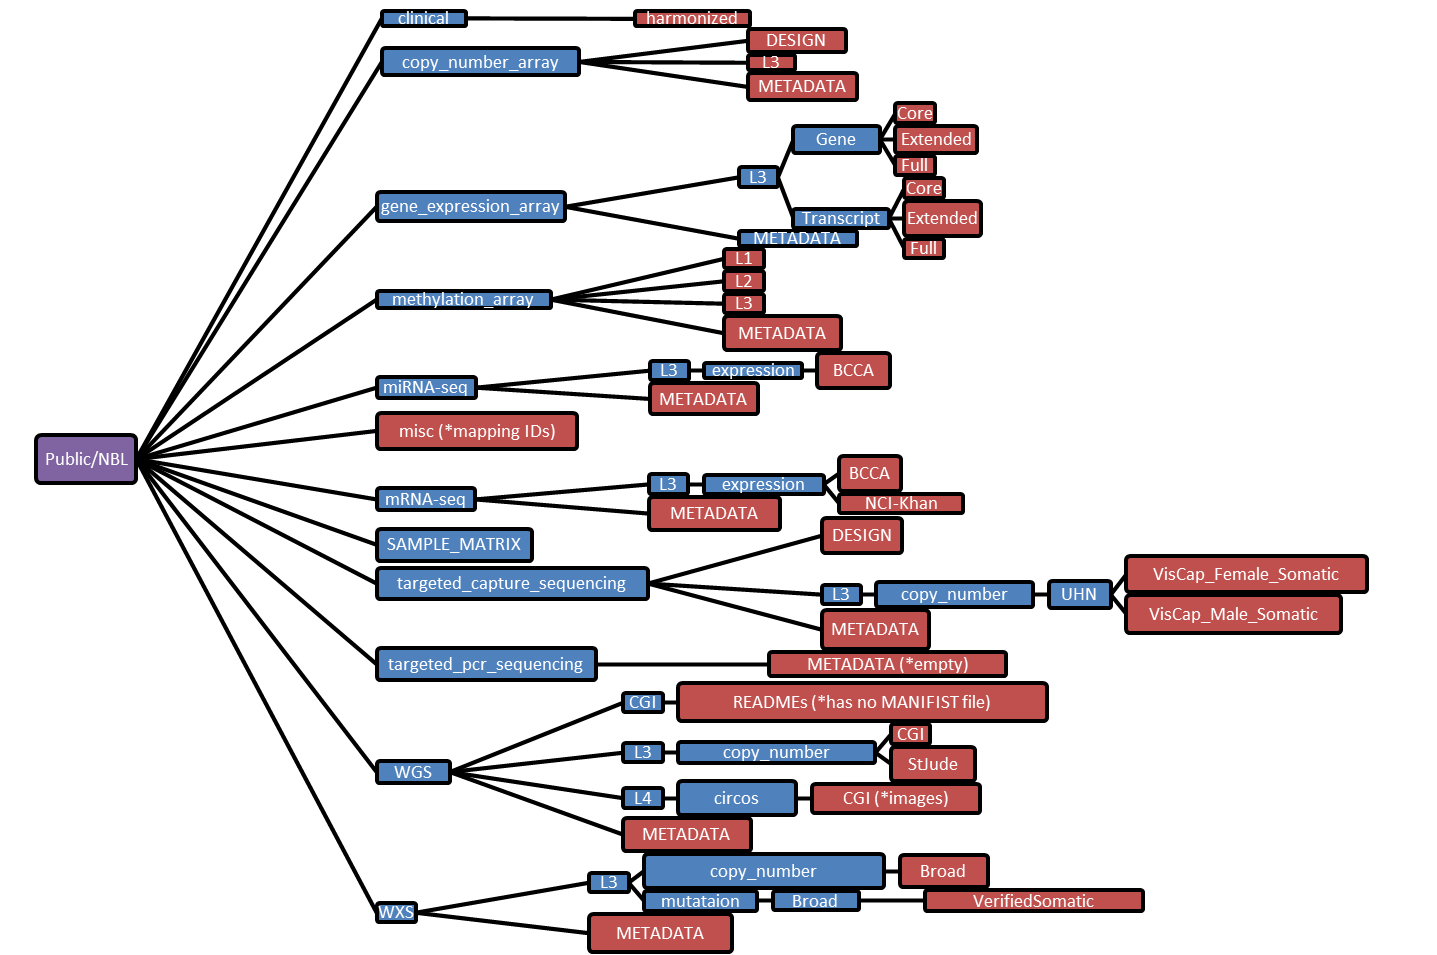

###copy number array:

Seeing which samples are present in copy number array:

In [3]:
url = "https://target-data.nci.nih.gov/Public/NBL/copy_number_array/METADATA/"
manifest_cna = pd.read_csv(url + "MANIFEST.txt", sep="*", header = None)
metadata_cna = pd.read_csv(url + manifest_cna.iloc[0,1], sep="\t")
metadata_cna.head()
samples_cna = np.unique(metadata_cna['characteristics: usi'])
len(samples_cna)

915

###gene expression array:

Seeing which samples are present in gene expression array:

In [4]:
url = "https://target-data.nci.nih.gov/Public/NBL/gene_expression_array/METADATA/"
manifest_gea = pd.read_csv(url + "MANIFEST.txt", sep="*", header = None)
metadata_gea = pd.read_csv(url + manifest_gea.iloc[1,1], sep="\t")
metadata_gea.head()
samples_gea = metadata_gea['Source Name'].apply(lambda x: x.split('-')[2])
samples_gea = np.unique(samples_gea)
len(samples_gea)

249

###methylation array:

Seeing which samples have methylation array data:

In [5]:
url = "https://target-data.nci.nih.gov/Public/NBL/methylation_array/METADATA/"
manifest_ma = pd.read_csv(url + "MANIFEST.txt", sep="*", header = None)
manifest_ma.head()
metadata_ma = pd.read_csv(url + manifest_ma.iloc[1,1], sep="\t")
metadata_ma.head()
samples_ma = metadata_ma['Sample Name'].apply(lambda x: x[0:19])
samples_ma = np.unique(samples_ma)
len(samples_ma)

235

###miRNA-seq:

Seeing which samples have miRNA-seq data:

In [6]:
url = "https://target-data.nci.nih.gov/Public/NBL/miRNA-seq/METADATA/"
manifest_mirna = pd.read_csv(url + "MANIFEST.txt", sep="*", header = None)
manifest_mirna.head()
metadata_mirna = pd.read_csv(url + manifest_mirna.iloc[1,1], sep="\t")
metadata_mirna.head()
samples_mirna = metadata_mirna['Sample Name'].apply(lambda x: x[0:19])
samples_mirna = np.unique(samples_mirna)
len(samples_mirna)

151

In [7]:
url = "https://target-data.nci.nih.gov/Public/NBL/miRNA-seq/L3/expression/BCCA/"
manifest_mirna_data = pd.read_csv(url + "MANIFEST.txt", sep="*", header=None)
manifest_mirna_data.head()
r,_ = manifest_mirna_data.shape
samples_mirna_data=[]
for i in range(r):
  temp=manifest_mirna_data.iloc[i,1].split('-')
  if len(temp)==5:
    samples_mirna_data.append(manifest_mirna_data.iloc[i,1][0:19])
len(np.unique(samples_mirna_data))

151

###mRNA-seq:

Seeing which samples have mRNA-seq data:

In [2]:
url = "https://target-data.nci.nih.gov/Public/NBL/mRNA-seq/METADATA/"
manifest_mrna = pd.read_csv(url + "MANIFEST.txt", sep="*", header = None)
manifest_mrna.head()
metadata_mrna = pd.read_csv(url + manifest_mrna.iloc[1,1], sep="\t")
metadata_mrna.head()
samples_mrna = metadata_mrna['Sample Name'].apply(lambda x: x[0:19])
samples_mrna = np.unique(samples_mrna)
len(samples_mrna)

168

In [5]:
#creating a dictionary to map NB ids to TARGET identifiers:
mRNA_dic={}
R,_ = metadata_mrna.shape
for i in range(R):
  if 'NB' in metadata_mrna['Comment[LIBRARY_NAME]'][i]:
    key = metadata_mrna['Derived Array Data File.1'][i].split('.')[0]
  else:
    key = metadata_mrna['Comment[LIBRARY_NAME]'][i].split(' ')[0]
  value = metadata_mrna['Sample Name'][i][0:19]
  mRNA_dic[key] = value

In [11]:
url = "https://target-data.nci.nih.gov/Public/NBL/mRNA-seq/L3/expression/"
manifest_mrna_data_BCCA = pd.read_csv(url + 'BCCA/' + "MANIFEST.txt", sep="*", header=None)
manifest_mrna_data_KHAN = pd.read_csv(url + 'NCI-Khan/' + "MANIFEST.txt", sep="*", header=None)
manifest_mrna_data_KHAN.head()
r,_ = manifest_mrna_data_BCCA.shape
samples_mrna_data_BCCA=[]
for i in range(r):
  temp=manifest_mrna_data_BCCA.iloc[i,1].split('.')
  if len(temp)==4:
    samples_mrna_data_BCCA.append(temp[0])
r,_ = manifest_mrna_data_KHAN.shape
samples_mrna_data_KHAN=[]
for i in range(r):
  temp=manifest_mrna_data_KHAN.iloc[i,1].split('.')
  if len(temp)==4:
    samples_mrna_data_KHAN.append(temp[0])
print('BCCA: ',len(np.unique(samples_mrna_data_BCCA)), '\nKHAN: ',len(np.unique(samples_mrna_data_KHAN)))

BCCA:  10 
KHAN:  161


In [12]:
#mapping sample names from NB to TARGET:
samples_mrna_data_KHANi = pd.DataFrame(samples_mrna_data_KHAN)[0].apply(lambda x: mRNA_dic[x])
print(len(np.unique(samples_mrna_data_KHANi)))
#mapping sample names from HS to TARGET:
samples_mrna_data_BCCAi = pd.DataFrame(samples_mrna_data_BCCA)[0].apply(lambda x: mRNA_dic[x])
print(len(np.unique(samples_mrna_data_BCCAi)))

155
10


##comparisons:

Comparing sample sets:

E:\Anaconda\lib\site-packages\venn\_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
E:\Anaconda\lib\site-packages\venn\_backwards_compatibility.py:30: UserWarning: `venn5()` is retained for backwards compatibility; use `venn()` instead
  warn((
C:\Users\ELHADY\AppData\Local\Temp/ipykernel_9368/484077559.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


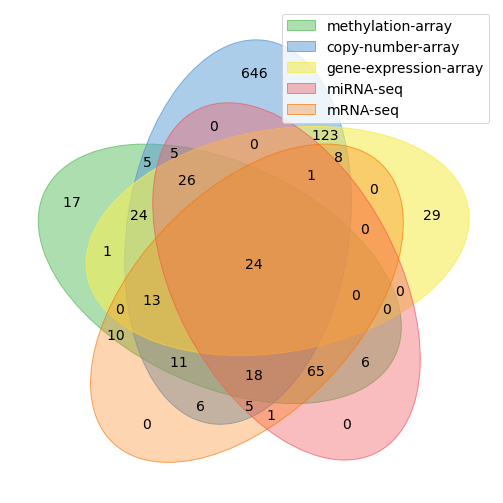

In [12]:
labels = venn.get_labels([set([x.split('-')[2] for x in samples_ma]), 
                          set(samples_cna), 
                          set(samples_gea), 
                          set([x.split('-')[2] for x in samples_mirna]), 
                          set([x.split('-')[2] for x in samples_mrna])], 
                         fill='number')
fig, ax = venn.venn4(labels, names=['methylation-array', 'copy-number-array', 'gene-expression-array', 'miRNA-seq', 'mRNA-seq'])
fig.show()
fig.savefig('samples.png', bbox_inches='tight')

E:\Anaconda\lib\site-packages\venn\_backwards_compatibility.py:30: UserWarning: `venn3()` is retained for backwards compatibility; use `venn()` instead
  warn((
C:\Users\ELHADY\AppData\Local\Temp/ipykernel_9368/3396841089.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


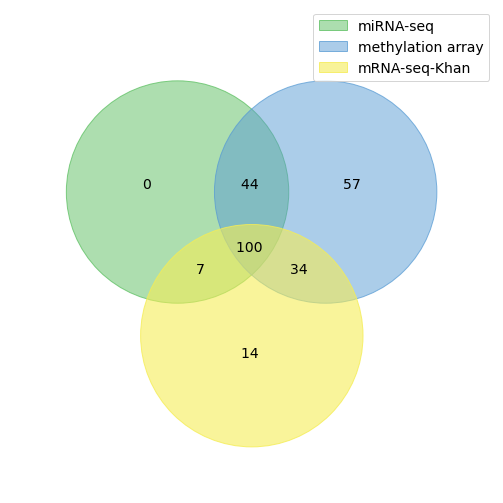

In [13]:
labels = venn.get_labels([set(samples_mirna_data), set(samples_ma), set(samples_mrna_data_KHANi)], 
                         fill='number')
fig, ax = venn.venn4(labels, names=['miRNA-seq', 'methylation array','mRNA-seq-Khan'])
fig.show()
fig.savefig('samples2.png', bbox_inches='tight')

In [13]:
samples_ours = np.intersect1d(samples_mirna_data, samples_ma)
samples_ours = np.intersect1d(samples_ours, samples_mrna_data_KHANi)
len(samples_ours) #should print 100

100

##Downloading data:

###mRNA-seq:

Read data into dictionary of dataframes:

In [8]:
#read MANIFEST file:
url = 'https://target-data.nci.nih.gov/Public/NBL/mRNA-seq/L3/expression/NCI-Khan/'
df = pd.read_csv(url + 'MANIFEST.txt', sep='*', header=None)
m, _ = df.shape
#loop over files:
mrna_data={}
for i in range(m):
  if 'gene' in df.iloc[i,1]:
    df_temp = pd.read_csv(url + df.iloc[i,1], sep='\t')
    mrna_data[df.iloc[i,1].split('.')[0]] = df_temp
len(list(mrna_data.keys()))

161

Check that all dataframes have the same row names in the same order:

In [16]:
a=[]
for key in mrna_data:
  for key2 in mrna_data:
    if key != key2:
      a.append('False' in mrna_data[key]['gene_id']==mrna_data[key2]['gene_id'])
print('True' in a)  #should print False
a=[]
for key in mrna_data:
  for key2 in mrna_data:
    if key != key2:
      a.append('False' in mrna_data[key]['locus']==mrna_data[key2]['locus'])
print('True' in a)  #should print False

False
False


Make a data frame for our 100 samples * genes(FPKM):

In [17]:
c=0
for key in mrna_data:
  if c == 0:
    DF = pd.DataFrame(mrna_data[key],columns=['gene_id'])
    c=1
  DF[mRNA_dic[key]]=mrna_data[key]['FPKM']

C:\Users\ELHADY\AppData\Local\Temp/ipykernel_9368/184877236.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  DF[mRNA_dic[key]]=mrna_data[key]['FPKM']


In [18]:
DF.shape

(56145, 156)

As gene ids are not unique, sum up rows of the same gene id:

In [19]:
unique_ids = {}
del_rows = []
r,_=DF.shape
for i in range(r):
  if not(DF['gene_id'][i] in unique_ids.keys()):
    unique_ids[DF['gene_id'][i]] = i
  else:
    DF['gene_id'][unique_ids[DF['gene_id'][i]]] += DF['gene_id'][i]
    del_rows.append(i)

C:\Users\ELHADY\AppData\Local\Temp/ipykernel_9368/1082963415.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['gene_id'][unique_ids[DF['gene_id'][i]]] += DF['gene_id'][i]


In [20]:
DF1 = DF.drop(index=del_rows)
DF1 = DF1.set_index(DF1['gene_id'].apply(lambda x: x[0:15]))
DF1 = DF1[samples_ours]
print(DF1.shape)
DF1.head()

(56038, 100)


,TARGET-30-PAIFXV-01,TARGET-30-PAISNS-01,TARGET-30-PAITCI-01,TARGET-30-PAIVHE-01,TARGET-30-PAKYZS-01,TARGET-30-PALETP-01,TARGET-30-PALEVG-01,TARGET-30-PALIIN-01,TARGET-30-PALXTB-01,TARGET-30-PALZZV-01,...,TARGET-30-PATDWN-01,TARGET-30-PATDXC-01,TARGET-30-PATEPF-01,TARGET-30-PATESI-01,TARGET-30-PATFCY-01,TARGET-30-PATFXV-01,TARGET-30-PATGJU-01,TARGET-30-PATGLU-01,TARGET-30-PATHKB-01,TARGET-30-PATHVK-01
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000240361,0.000000,0.000000,0.000000,0.000000,0.000000,0.016819,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.016256,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000237613,0.000000,0.000000,0.000000,0.000000,0.006933,0.000000,0.017305,0.035827,0.000000,0.000000,...,0.000000,0.024491,0.000000,0.000000,0.000000,0.000000,0.000000,0.042514,0.017060,0.012447
ENSG00000186092,0.023813,0.000000,0.000000,0.019793,0.000000,0.000000,0.000000,0.000000,0.022386,0.000000,...,0.000000,0.000000,0.000000,0.002916,0.000000,0.000000,0.030210,0.000000,0.000000,0.019682
ENSG00000238009,0.679684,0.794592,0.368635,0.579218,0.442290,8.939290,0.442652,0.318188,0.606917,0.717158,...,0.529266,0.353368,0.507489,0.510696,0.376284,0.506386,0.635194,0.512899,0.423164,0.956344
ENSG00000239945,0.370317,0.268519,0.232965,0.232868,0.658962,0.585875,0.261749,0.608508,0.292840,0.203674,...,0.437924,0.187812,0.461209,0.511270,0.452121,0.523109,0.230515,0.179250,0.213939,0.314993


Save mRNA-seq data to file:

In [21]:
DF1.to_csv('NBL_mRNA_FPKM.csv')


##TPM_from_FPKM:

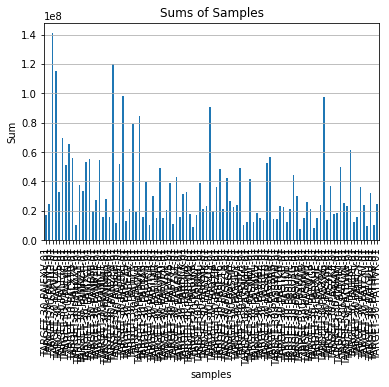

<Figure size 4320x1080 with 0 Axes>

In [22]:
sums = DF1.sum(axis=0)
sums.plot(kind='bar')
plt.title('Sums of Samples')
plt.xlabel('samples')
plt.ylabel('Sum')
plt.rcParams["figure.figsize"] = [60, 15]
plt.grid(axis = 'y')
plt.legend = False
plt.show()
plt.savefig('sums_of_samples_FPKM.png', bbox_inches='tight')

Function for calculating TPM from FPKM:

In [23]:
def FPKM_2_TPM(fpkm_df):
  sums = []
  _,c=fpkm_df.shape
  for i in range(c):
    sums.append(sum(fpkm_df.iloc[:,i]))
    fpkm_df.iloc[:,i]=fpkm_df.iloc[:,i].apply(lambda x: 1000000 * x/sums[i])
  return fpkm_df

Using function to get mRNA-seq TPM data:

In [24]:
TPM_df = FPKM_2_TPM(DF1)
TPM_df.to_csv('NBL_mRNA_TPM.csv')

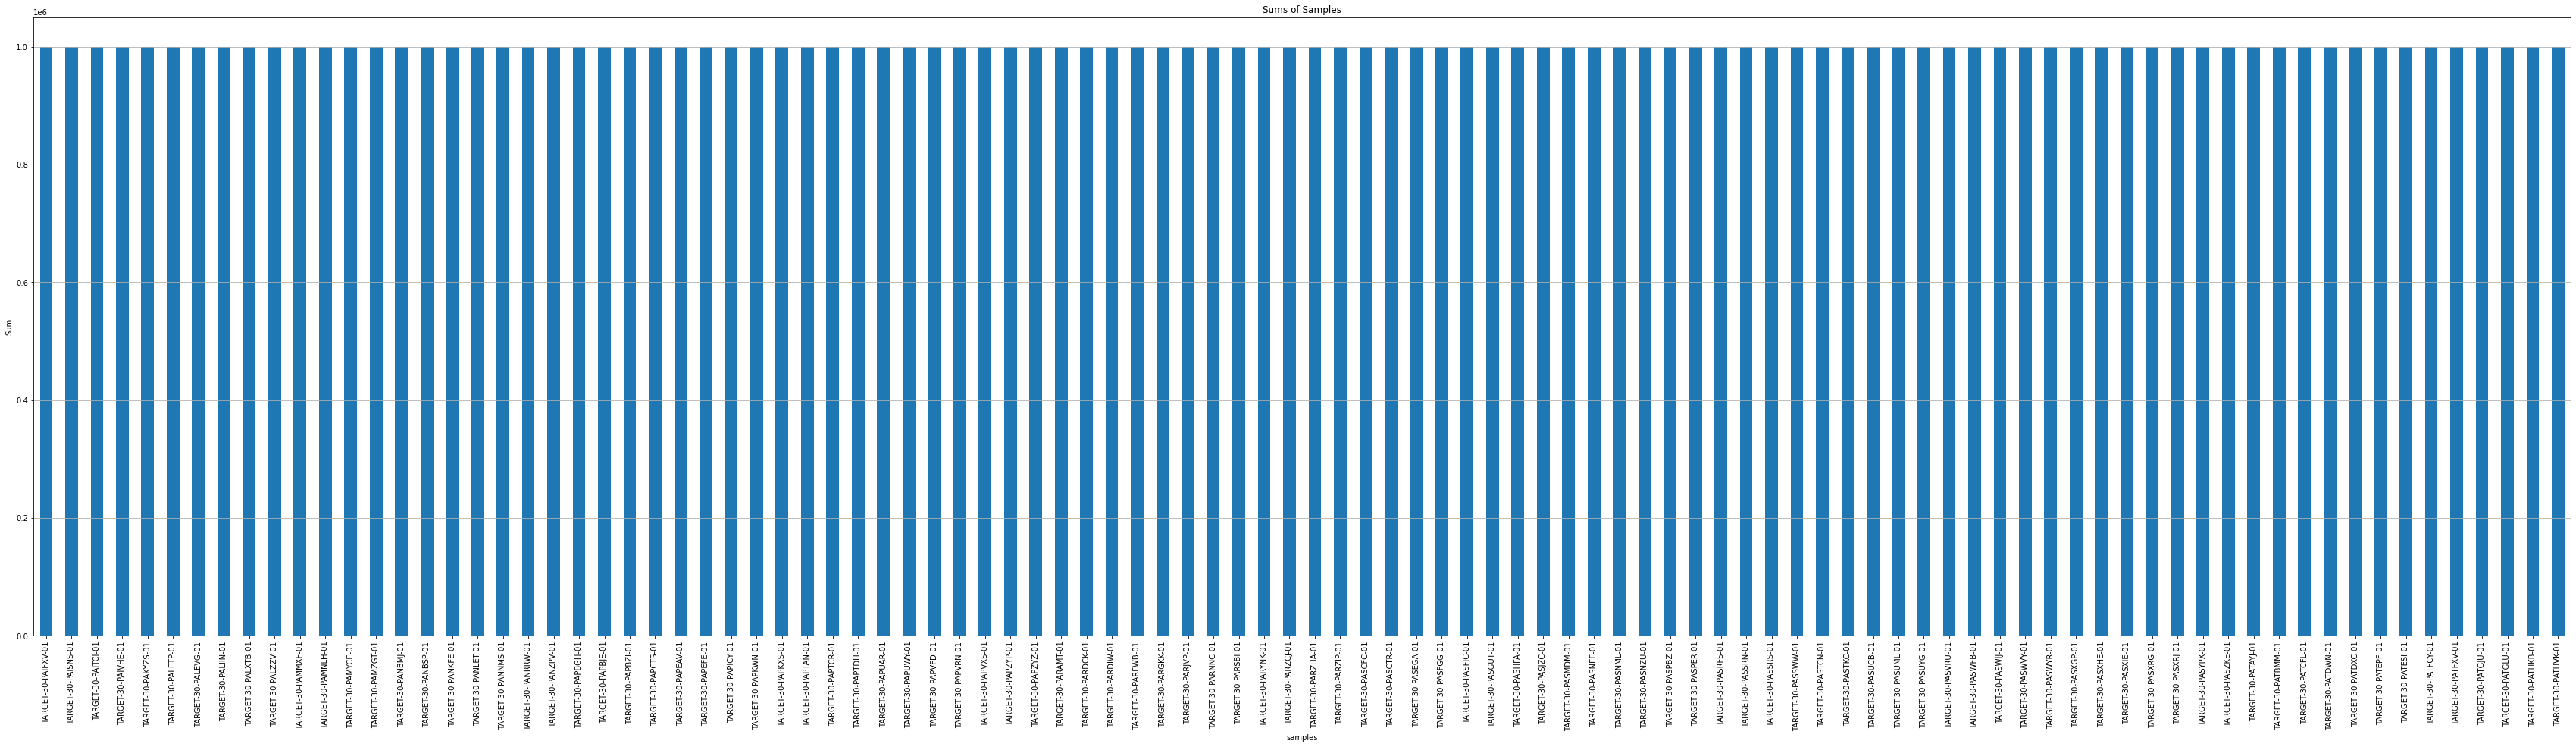

<Figure size 3600x432 with 0 Axes>

In [25]:
sums = TPM_df.sum(axis=0)
sums.plot(kind='bar')
plt.title('Sums of Samples')
plt.xlabel('samples')
plt.ylabel('Sum')
plt.rcParams["figure.figsize"] = [50, 6]
plt.grid(axis = 'y')
plt.legend = False
plt.show()
plt.savefig('sums_of_samples_TPM.png', bbox_inches='tight')

In [9]:
#save one complete mRNA profile for chromosome mapping:
mrna_data['NB2001'].to_csv('TARGET-30-PALBFW-01_mRNA.csv')

###miRNA-seq:

Read data into dictionary of dataframes:

In [26]:
#read MANIFEST file:
url = 'https://target-data.nci.nih.gov/Public/NBL/miRNA-seq/L3/expression/BCCA/'
df = pd.read_csv(url + 'MANIFEST.txt', sep='*', header=None)
m, _ = df.shape
#loop over files:
mirna_data={}
for i in range(m):
  if 'mirna' in df.iloc[i,1]:
    df_temp = pd.read_csv(url + df.iloc[i,1], sep='\t')
    mirna_data[df.iloc[i,1][0:19]] = df_temp
len(list(mirna_data.keys()))

151

Check that all dataframes have the same row names in the same order:

In [27]:
a=[]  
for key in mirna_data:
  for key2 in mirna_data:
    if key != key2:
      a.append('False' in mirna_data[key]['miRNA_ID']==mirna_data[key2]['miRNA_ID'])
print('True' in a)  #should print False

False


Make a data frame for our 100 samples * miRNA (reads_per_million_miRNA_mapped):  

In [28]:
c=0
for key in mirna_data:
  if c == 0:
    DF = pd.DataFrame(mirna_data[key]['miRNA_ID'])
    c=1
  DF[key]=mirna_data[key]['reads_per_million_miRNA_mapped']
DF = DF.set_index(DF['miRNA_ID'])
DF = DF[samples_ours]
print(DF.shape)
DF.head()

(1870, 100)


C:\Users\ELHADY\AppData\Local\Temp/ipykernel_9368/4141916382.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  DF[key]=mirna_data[key]['reads_per_million_miRNA_mapped']


,TARGET-30-PAIFXV-01,TARGET-30-PAISNS-01,TARGET-30-PAITCI-01,TARGET-30-PAIVHE-01,TARGET-30-PAKYZS-01,TARGET-30-PALETP-01,TARGET-30-PALEVG-01,TARGET-30-PALIIN-01,TARGET-30-PALXTB-01,TARGET-30-PALZZV-01,...,TARGET-30-PATDWN-01,TARGET-30-PATDXC-01,TARGET-30-PATEPF-01,TARGET-30-PATESI-01,TARGET-30-PATFCY-01,TARGET-30-PATFXV-01,TARGET-30-PATGJU-01,TARGET-30-PATGLU-01,TARGET-30-PATHKB-01,TARGET-30-PATHVK-01
miRNA_ID,,,,,,,,,,,,,,,,,,,,,
hsa-let-7a-1,30638.761125,19046.453645,25327.081245,23549.675436,36196.460671,28946.051331,34733.843975,20522.655229,23764.331365,53726.146888,...,80101.500054,44081.755650,5844.858031,72607.997527,17462.301442,65545.447306,52363.317804,35698.843595,23739.389927,31802.191889
hsa-let-7a-2,30605.634620,19045.388118,25251.963381,23424.632150,36025.061158,29030.462466,34725.798146,20479.940769,23760.594982,53655.974100,...,79703.215198,44031.575500,5798.872718,72796.901967,17400.295132,65356.488752,52761.517939,35384.063696,23610.207826,31566.753278
hsa-let-7a-3,30688.309317,19076.680948,25719.595854,23684.511269,36297.600548,29174.399377,35031.539650,20616.024658,24029.054116,54016.419869,...,79972.718666,44326.629545,5810.279928,73930.328608,17631.313789,65772.589196,53557.918210,36244.795016,23842.813079,32013.606151
hsa-let-7b,32394.324325,6428.377190,27470.507681,26947.258636,37717.808409,53604.853162,37791.259011,39205.713661,24655.645582,95018.464743,...,37590.863152,48465.378316,3969.797987,47930.208396,15347.464852,80744.372690,80456.337355,36565.374340,11454.791881,27121.628919
hsa-let-7c,25753.875730,884.835601,1194.088776,3464.947311,10979.767775,8086.945061,8158.470649,1861.364743,9085.763072,39538.279961,...,3578.540988,3761.152964,2259.073054,7393.032861,728.423648,40888.150895,15012.145104,14625.988641,1183.943304,13297.089117


Save miRNA-seq data to file:

In [29]:
DF.to_csv('NBL_miRNA_RPM.csv')

###Methylation-array:

Read data into dictionary of dataframes:

In [14]:
### L3
#read MANIFEST file:
url = 'https://target-data.nci.nih.gov/Public/NBL/methylation_array/L3/'
df = pd.read_csv(url + 'MANIFEST.txt', sep='*', header=None)
m, _ = df.shape
#loop over files:
ma3_data={}
for i in range(m):
  if df.iloc[i,1].split('.')[4][0:19] in np.array(samples_ours):
    df_temp = pd.read_csv(url + df.iloc[i,1], sep='\t',skiprows=1)
    ma3_data[df.iloc[i,1].split('.')[4][0:19]] = df_temp
len(list(ma3_data.keys()))

100

Check that all dataframes have the same row names in the same order:

In [15]:
a=[]  
for key in ma3_data:
  for key2 in ma3_data:
    if key != key2:
      a.append('False' in ma3_data[key]['Reporter ID'] == ma3_data[key2]['Reporter ID'])
print('True' in a)  #should print False

False


Make a data frame for our 100 samples * methylation data (Beta values):  

In [16]:
c=0
for key in ma3_data:
  if c == 0:
    DF = pd.DataFrame(ma3_data[key]['Reporter ID'])
    c=1
  DF[key]=ma3_data[key]['Beta_value']
print(DF.shape)
DF.head()

C:\Users\ELHADY\AppData\Local\Temp/ipykernel_4872/3050370783.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  DF[key]=ma3_data[key]['Beta_value']


(485577, 101)


,Reporter ID,TARGET-30-PAIFXV-01,TARGET-30-PAISNS-01,TARGET-30-PAITCI-01,TARGET-30-PAIVHE-01,TARGET-30-PAKYZS-01,TARGET-30-PALETP-01,TARGET-30-PALEVG-01,TARGET-30-PALIIN-01,TARGET-30-PALXTB-01,...,TARGET-30-PATDWN-01,TARGET-30-PATDXC-01,TARGET-30-PATEPF-01,TARGET-30-PATESI-01,TARGET-30-PATFCY-01,TARGET-30-PATFXV-01,TARGET-30-PATGJU-01,TARGET-30-PATGLU-01,TARGET-30-PATHKB-01,TARGET-30-PATHVK-01
0,cg00000029,0.256895,0.901109,0.209931,0.703042,0.434552,0.610460,0.802335,0.460511,0.369797,...,0.242562,0.463208,0.361070,0.625449,0.300879,0.309036,0.420854,0.448398,0.291337,0.662287
1,cg00000108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cg00000109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cg00000165,0.083019,0.192003,0.056883,0.174987,0.175065,0.140741,0.134155,0.175702,0.156287,...,0.261940,0.616988,0.119855,0.137549,0.145591,0.124297,0.109805,0.121901,0.078846,0.098836
4,cg00000236,0.899584,0.934346,0.873123,0.925039,0.901732,0.908468,0.865434,0.934045,0.873403,...,0.790024,0.866715,0.908031,0.867449,0.917041,0.886676,0.885965,0.904092,0.834721,0.867039


In [17]:
DF1 = DF.set_index(DF['Reporter ID'])
DF1 = DF1.drop(columns=['Reporter ID'])
print(DF1.shape)
DF1.head()

(485577, 100)


,TARGET-30-PAIFXV-01,TARGET-30-PAISNS-01,TARGET-30-PAITCI-01,TARGET-30-PAIVHE-01,TARGET-30-PAKYZS-01,TARGET-30-PALETP-01,TARGET-30-PALEVG-01,TARGET-30-PALIIN-01,TARGET-30-PALXTB-01,TARGET-30-PALZZV-01,...,TARGET-30-PATDWN-01,TARGET-30-PATDXC-01,TARGET-30-PATEPF-01,TARGET-30-PATESI-01,TARGET-30-PATFCY-01,TARGET-30-PATFXV-01,TARGET-30-PATGJU-01,TARGET-30-PATGLU-01,TARGET-30-PATHKB-01,TARGET-30-PATHVK-01
Reporter ID,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.256895,0.901109,0.209931,0.703042,0.434552,0.610460,0.802335,0.460511,0.369797,0.422726,...,0.242562,0.463208,0.361070,0.625449,0.300879,0.309036,0.420854,0.448398,0.291337,0.662287
cg00000108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cg00000165,0.083019,0.192003,0.056883,0.174987,0.175065,0.140741,0.134155,0.175702,0.156287,0.124424,...,0.261940,0.616988,0.119855,0.137549,0.145591,0.124297,0.109805,0.121901,0.078846,0.098836
cg00000236,0.899584,0.934346,0.873123,0.925039,0.901732,0.908468,0.865434,0.934045,0.873403,0.922746,...,0.790024,0.866715,0.908031,0.867449,0.917041,0.886676,0.885965,0.904092,0.834721,0.867039


Save methylation data to file:

In [34]:
DF1.to_csv('NBL_methylation_beta_values.csv')

Save one complete methylation data file for mapping CpG loci to gene symbols:

In [35]:
ma3_data['TARGET-30-PAIFXV-01'].to_csv('TARGET-30-PAIFXV-01')

####quality control:

In [18]:
### L2
#read MANIFEST file:
url = 'https://target-data.nci.nih.gov/Public/NBL/methylation_array/L2/'
df = pd.read_csv(url + 'MANIFEST.txt', sep='*', header=None)
m, _ = df.shape
#loop over files:
ma2_data={}
for i in range(m):
  if df.iloc[i,1].split('.')[4][0:19] in np.array(samples_ours):
    df_temp = pd.read_csv(url + df.iloc[i,1], sep='\t',skiprows=1)
    ma2_data[df.iloc[i,1].split('.')[4][0:19]] = df_temp
len(list(ma2_data.keys())) 

100

Check that all dataframes have the same row names in the same order:

In [19]:
a=[]  
for key in ma2_data:
  for key2 in ma2_data:
    if key != key2:
      a.append('False' in ma2_data[key]['Reporter ID'] == ma2_data[key2]['Reporter ID'])
print('True' in a)  #should print False

False


Make a data frame for our 100 samples * methylation data (Detection p-value):  

In [20]:
c=0
for key in ma2_data:
  if c == 0:
    DF = pd.DataFrame(ma2_data[key]['Reporter ID'])
    c=1
  DF[key]=ma2_data[key]['Detection_P_value']
DF = DF.set_index(DF['Reporter ID'])
print(DF.shape)
DF.head()

C:\Users\ELHADY\AppData\Local\Temp/ipykernel_4872/2051232458.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  DF[key]=ma2_data[key]['Detection_P_value']


(485577, 101)


,Reporter ID,TARGET-30-PAIFXV-01,TARGET-30-PAISNS-01,TARGET-30-PAITCI-01,TARGET-30-PAIVHE-01,TARGET-30-PAKYZS-01,TARGET-30-PALETP-01,TARGET-30-PALEVG-01,TARGET-30-PALIIN-01,TARGET-30-PALXTB-01,...,TARGET-30-PATDWN-01,TARGET-30-PATDXC-01,TARGET-30-PATEPF-01,TARGET-30-PATESI-01,TARGET-30-PATFCY-01,TARGET-30-PATFXV-01,TARGET-30-PATGJU-01,TARGET-30-PATGLU-01,TARGET-30-PATHKB-01,TARGET-30-PATHVK-01
Reporter ID,,,,,,,,,,,,,,,,,,,,,
cg00000029,cg00000029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cg00000108,cg00000108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cg00000109,cg00000109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cg00000165,cg00000165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cg00000236,cg00000236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
DF1 = DF.set_index(DF['Reporter ID'])
DF1 = DF1.drop(columns=['Reporter ID'])
print(DF1.shape)
DF1.head()

(485577, 100)


,TARGET-30-PAIFXV-01,TARGET-30-PAISNS-01,TARGET-30-PAITCI-01,TARGET-30-PAIVHE-01,TARGET-30-PAKYZS-01,TARGET-30-PALETP-01,TARGET-30-PALEVG-01,TARGET-30-PALIIN-01,TARGET-30-PALXTB-01,TARGET-30-PALZZV-01,...,TARGET-30-PATDWN-01,TARGET-30-PATDXC-01,TARGET-30-PATEPF-01,TARGET-30-PATESI-01,TARGET-30-PATFCY-01,TARGET-30-PATFXV-01,TARGET-30-PATGJU-01,TARGET-30-PATGLU-01,TARGET-30-PATHKB-01,TARGET-30-PATHVK-01
Reporter ID,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cg00000108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cg00000109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cg00000165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cg00000236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Save methylation data to file:

In [22]:
DF1.to_csv('NBL_methylation_detection_p_values.csv')